# REQUIRED LIBRARIES

In [546]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
import warnings
warnings.filterwarnings("ignore") # supress warnings

In [547]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#READING DATA

In [548]:
data = pd.read_csv(r"/content/drive/MyDrive/PreparedClinicalData.csv")
# data = pd.read_csv("PreparedMNCData.csv")
# data = pd.read_csv("PreparedClinicalData.csv")

In [549]:
data.head()

,Unnamed: 0,ReportId,StateId,DistrictId,DistrictName,TalukaId,MncHospitalId,MncVisiteDate,ReportingMonthyear,ReportingDate,...,CreatedDate,IsMnc,Manochaitanya,total_male,total_female,total_new,total_old,total_op,total_ip,TotalVisitedPatients
0,0,21,17,3,Bangalore Urban,298.0,NaN,NaN,2017-04-01,2017-08-09,...,2017-08-09,0,N,75.0,64.0,13.0,126.0,139.0,0.0,139.0
1,1,22,17,45,Bbmp,297.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,3.0,3.0,4.0,2.0,6.0,0.0,6.0
2,2,23,17,45,Bbmp,296.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,24,17,45,Bbmp,295.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,3.0,0.0,1.0,2.0,3.0,0.0,3.0
4,4,25,17,45,Bbmp,294.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [550]:
data['MncVisiteDate'] = pd.to_datetime(data['MncVisiteDate'],  errors='coerce', format='%Y-%m-%d')
data['ReportingMonthyear'] = pd.to_datetime(data['ReportingMonthyear'],  errors='coerce', format='%Y-%m-%d')

In [551]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49335 entries, 0 to 49334
Data columns (total 81 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            49335 non-null  int64         
 1   ReportId                              49335 non-null  int64         
 2   StateId                               49335 non-null  int64         
 3   DistrictId                            49335 non-null  int64         
 4   DistrictName                          49335 non-null  object        
 5   TalukaId                              49323 non-null  float64       
 6   MncHospitalId                         10794 non-null  float64       
 7   MncVisiteDate                         10791 non-null  datetime64[ns]
 8   ReportingMonthyear                    49335 non-null  datetime64[ns]
 9   ReportingDate                         49335 non-null  object        
 10

In [552]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [553]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [554]:
data.set_index(('MncVisiteDate'), inplace = True)
data.index

DatetimeIndex(['NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT',
               ...
               'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT'],
              dtype='datetime64[ns]', name='MncVisiteDate', length=49335, freq=None)

In [555]:
data.describe()

,Unnamed: 0,ReportId,StateId,DistrictId,TalukaId,MncHospitalId,old_smd_male,old_smd_female,new_smd_male,new_smd_female,...,InPatient_12,FacilityId,IsMnc,total_male,total_female,total_new,total_old,total_op,total_ip,TotalVisitedPatients
count,49335.000000,49335.000000,49335.0,49335.000000,49323.000000,10794.000000,49335.000000,49335.000000,49335.000000,49335.000000,...,49333.000000,38539.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000
mean,24667.000000,29532.193615,17.0,23.836607,142.113679,200.855012,6.387027,5.478869,1.436951,1.264032,...,0.008919,1420.966190,0.270923,39.519165,31.485700,14.943894,47.124739,71.004865,0.544279,73.284828
std,14241.932102,21283.428045,0.0,13.076381,90.790445,156.538894,26.229063,20.829407,6.983477,6.144499,...,1.160917,991.173439,0.553331,132.402065,90.932028,57.129103,163.971607,216.364867,11.719208,226.122560
min,0.000000,21.000000,17.0,1.000000,0.000000,101.000000,-3.000000,-8.000000,-3.000000,-2.000000,...,-9.000000,0.000000,0.000000,-13.000000,-11.000000,-10.000000,-19.000000,-20.000000,-17.000000,-20.000000
25%,12333.500000,12480.500000,17.0,15.000000,108.000000,151.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,518.000000,0.000000,4.000000,3.000000,0.000000,3.000000,7.000000,0.000000,7.000000
50%,24667.000000,26518.000000,17.0,21.000000,147.000000,194.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1341.000000,0.000000,10.000000,9.000000,2.000000,11.000000,20.000000,0.000000,21.000000
75%,37000.500000,39852.500000,17.0,34.000000,210.000000,241.000000,4.000000,3.000000,1.000000,1.000000,...,0.000000,2499.000000,0.000000,26.000000,23.000000,11.000000,31.000000,49.000000,0.000000,50.000000
max,49334.000000,77007.000000,17.0,45.000000,298.000000,4020.000000,1017.000000,941.000000,502.000000,509.000000,...,253.000000,2892.000000,3.000000,11849.000000,4317.000000,2138.000000,11834.000000,11860.000000,1056.000000,11860.000000


In [556]:
helpfuldata = pd.DataFrame()
helpfuldata = data[["TotalVisitedPatients", "DistrictId", "TalukaId", "ReportingMonthyear"]]
helpfuldata

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
NaT,139.0,3,298.0,2017-04-01
NaT,6.0,45,297.0,2017-04-01
NaT,0.0,45,296.0,2017-04-01
NaT,3.0,45,295.0,2017-04-01
NaT,0.0,45,294.0,2017-04-01
...,...,...,...,...
NaT,0.0,29,196.0,2020-08-01
NaT,6.0,41,260.0,2020-08-01
NaT,57.0,37,238.0,2020-08-01


In [557]:
data['TotalVisitedPatients'].describe()

count    49335.000000
mean        73.284828
std        226.122560
min        -20.000000
25%          7.000000
50%         21.000000
75%         50.000000
max      11860.000000
Name: TotalVisitedPatients, dtype: float64

In [558]:
data['TotalVisitedPatients'].isnull().sum()

0

In [559]:
data.TotalVisitedPatients.isna().any()

False

In [560]:
check_for_nan = data['TotalVisitedPatients'].isnull()
print (check_for_nan)

MncVisiteDate
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
       ...  
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
Name: TotalVisitedPatients, Length: 49335, dtype: bool


In [561]:
cols = ['TotalVisitedPatients']
helpfuldata[cols] = helpfuldata[cols].applymap(np.int64)

In [562]:
helpfuldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49335 entries, NaT to NaT
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  49335 non-null  int64         
 1   DistrictId            49335 non-null  int64         
 2   TalukaId              49323 non-null  float64       
 3   ReportingMonthyear    49335 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 MB


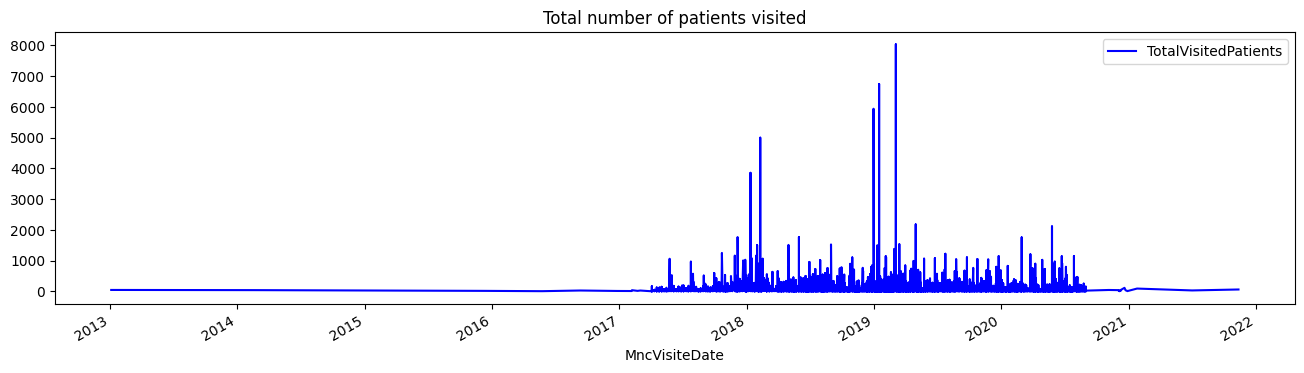

In [563]:
helpfuldata.plot(kind='line', y='TotalVisitedPatients',color='blue', figsize=(16, 4) )
plt.legend(loc='best')
plt.title('Total number of patients visited')
plt.show()

# CHOOSING DISTRICT

In [564]:
print(helpfuldata['DistrictId'].max())
print(helpfuldata['DistrictId'].min())

45
1


In [565]:
dist = helpfuldata[helpfuldata['DistrictId']==12]

In [566]:
dist.head()

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
NaT,208,12,124.0,2017-04-01
NaT,244,12,123.0,2017-04-01
NaT,124,12,122.0,2017-04-01
NaT,104,12,121.0,2017-04-01
NaT,132,12,120.0,2017-04-01


In [567]:
mnc_monthly = pd.DataFrame()

In [568]:
mnc_monthly = dist

In [569]:
mnc_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5099 entries, NaT to NaT
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  5099 non-null   int64         
 1   DistrictId            5099 non-null   int64         
 2   TalukaId              5099 non-null   float64       
 3   ReportingMonthyear    5099 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 199.2 KB


In [570]:
mnc_monthly.head()

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
NaT,208,12,124.0,2017-04-01
NaT,244,12,123.0,2017-04-01
NaT,124,12,122.0,2017-04-01
NaT,104,12,121.0,2017-04-01
NaT,132,12,120.0,2017-04-01


In [571]:
mnc_monthly.describe()

,TotalVisitedPatients,DistrictId,TalukaId
count,5099.000000,5099.0,5099.000000
mean,35.588351,12.0,111.616199
std,115.133972,0.0,31.224179
min,-2.000000,12.0,0.000000
25%,5.000000,12.0,117.000000
50%,9.000000,12.0,119.000000
75%,17.000000,12.0,123.000000
max,1611.000000,12.0,125.000000


# Outlier warning module
Percentile : The percent of population which lies below that value

Quantile : The cut points dividing the range of probability distribution into continuous intervals with equal probability. There are q-1 of q quantiles one of each k satisfying 0 < k < q

Quartile : Quartile is a special case of quantile, quartiles cut the data set into four equal parts i.e. q=4 for quantiles so we have First quartile Q1, second quartile Q2(Median) and third quartile Q3

Quartile First quartile The first quartile is determined by No of elements ×(1/4). It is the rank in the population (from least to greatest values) at which approximately 1/4 of the values are less than the value of the first quartile.

In [572]:
Q0 = mnc_monthly.TotalVisitedPatients.quantile(0)
Q1 = mnc_monthly.TotalVisitedPatients.quantile(0.25)
Q3 = mnc_monthly.TotalVisitedPatients.quantile(0.75)
IQR = Q3 - Q1

In [573]:
print(IQR)
print(Q0)
print(Q1)
print(Q3)

12.0
-2.0
5.0
17.0


In [574]:
min_value = Q0
print(min_value)

max_value = Q3 + 1.5 * IQR
print(max_value)

-2.0
35.0


In [575]:
value ={}

In [576]:
if value == 0:
 print('Entering a zero value, confirm if zero is ok')
elif not bool(value):
   # Check if this field is empty
   print('This field can not be empty, please enter a value')
elif (value < min_value):
   print ("The number of patients visited is less than the least number of patients visited in the past. Please confirm")
elif (value > max_value):
   print ("The number of patients is much higher than the number of patients visited in the past. Please confirm")

This field can not be empty, please enter a value


# ADJUSTING MNC_MONTHLY

In [577]:
mnc_monthly.drop(['DistrictId', 'DistrictId','ReportingMonthyear', 'TalukaId'],axis = 1, inplace = True)

In [578]:
mnc_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5099 entries, NaT to NaT
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TotalVisitedPatients  5099 non-null   int64
dtypes: int64(1)
memory usage: 79.7 KB


In [579]:
mnc_monthly

,TotalVisitedPatients
MncVisiteDate,
NaT,208
NaT,244
NaT,124
NaT,104
NaT,132
...,...
NaT,205
NaT,264
NaT,13


In [580]:
mnc_monthly['TotalVisitedPatients'].isnull().sum()

0

In [581]:
mnc_monthly.TotalVisitedPatients.isna().any()

False

In [582]:
check_for_nan = mnc_monthly['TotalVisitedPatients'].isnull()
print (check_for_nan)

MncVisiteDate
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
       ...  
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
Name: TotalVisitedPatients, Length: 5099, dtype: bool


In [583]:
mnc_monthly.index = dist.index

In [584]:
mnc_monthly.index

DatetimeIndex(['NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT',
               ...
               'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT'],
              dtype='datetime64[ns]', name='MncVisiteDate', length=5099, freq=None)

In [585]:
mnc_monthly.head()

,TotalVisitedPatients
MncVisiteDate,
NaT,208
NaT,244
NaT,124
NaT,104
NaT,132


In [586]:
mnc_monthly = mnc_monthly.resample('M').sum()

In [587]:
mnc_monthly.head(20)

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,59
2017-05-31,83
2017-06-30,151
2017-07-31,142
2017-08-31,130
2017-09-30,163
2017-10-31,98
2017-11-30,189
2017-12-31,188


In [588]:
mnc_monthly.describe()

,TotalVisitedPatients
count,41.000000
mean,215.585366
std,87.899936
min,-2.000000
25%,163.000000
50%,224.000000
75%,271.000000
max,426.000000


In [589]:
smallest10 = mnc_monthly.nsmallest(10, ['TotalVisitedPatients'])
smallest10

,TotalVisitedPatients
MncVisiteDate,
2020-04-30,-2
2017-04-30,59
2017-05-31,83
2017-10-31,98
2020-05-31,104
2018-02-28,123
2018-03-31,128
2017-08-31,130
2017-07-31,142


In [590]:
largest10 = mnc_monthly.nlargest(10, ['TotalVisitedPatients'])
largest10

,TotalVisitedPatients
MncVisiteDate,
2020-02-29,426
2019-03-31,363
2019-11-30,343
2018-11-30,325
2019-05-31,316
2020-03-31,315
2019-06-30,313
2018-09-30,282
2019-08-31,280


In [591]:
print(mnc_monthly)

               TotalVisitedPatients
MncVisiteDate                      
2017-04-30                       59
2017-05-31                       83
2017-06-30                      151
2017-07-31                      142
2017-08-31                      130
2017-09-30                      163
2017-10-31                       98
2017-11-30                      189
2017-12-31                      188
2018-01-31                      182
2018-02-28                      123
2018-03-31                      128
2018-04-30                      271
2018-05-31                      224
2018-06-30                      181
2018-07-31                      268
2018-08-31                      268
2018-09-30                      282
2018-10-31                      204
2018-11-30                      325
2018-12-31                      228
2019-01-31                      168
2019-02-28                      278
2019-03-31                      363
2019-04-30                      226
2019-05-31                  

#PLOTTING GRAPHS OF TOTAL VISITED PATIENTS

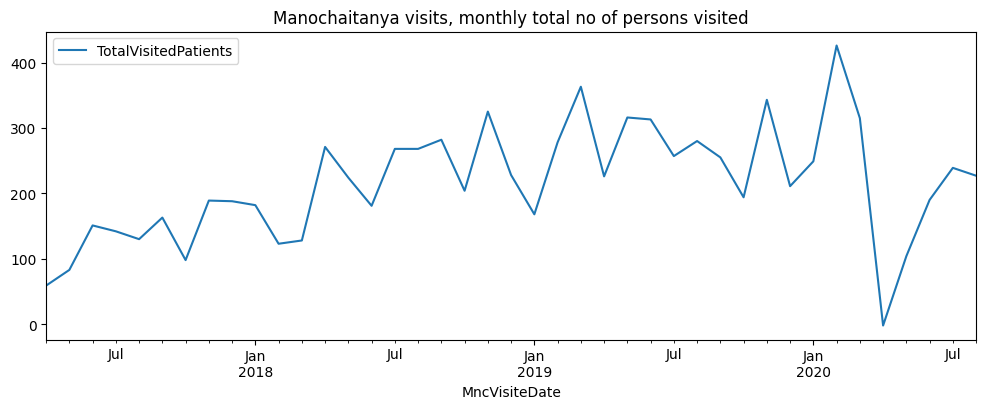

In [592]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya visits, monthly total no of persons visited')
plt.show()

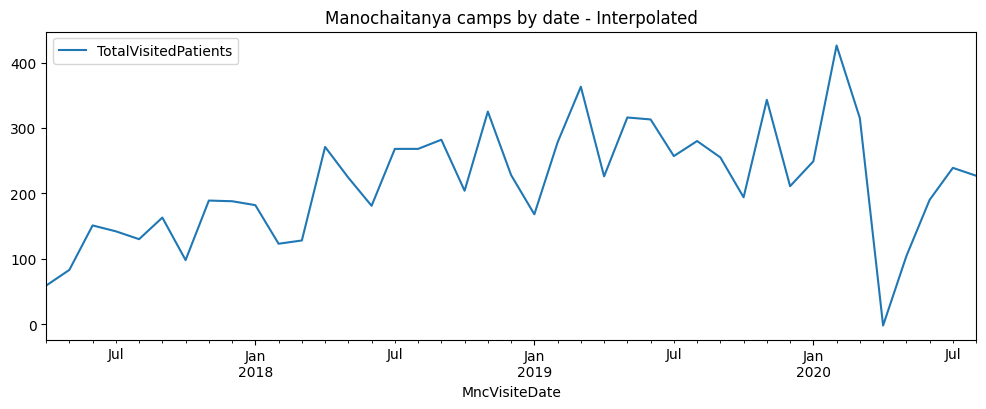

In [593]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya camps by date - Interpolated')
plt.show()

In [594]:
mnc_monthly['TotalVisitedPatients'].replace(to_replace=0, method='ffill', inplace = True)
# Impute the values with the previous value

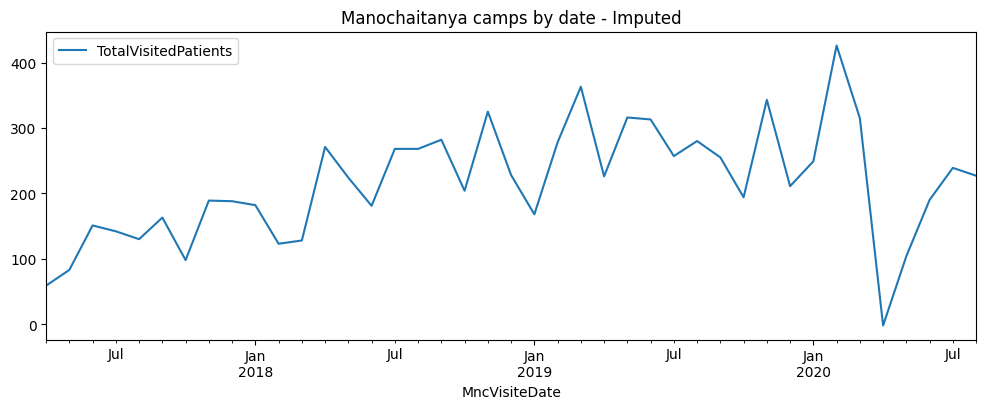

In [595]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya camps by date - Imputed')
plt.show()

#AUTO CORELATION AND PARTIAL AUTOCORELATION

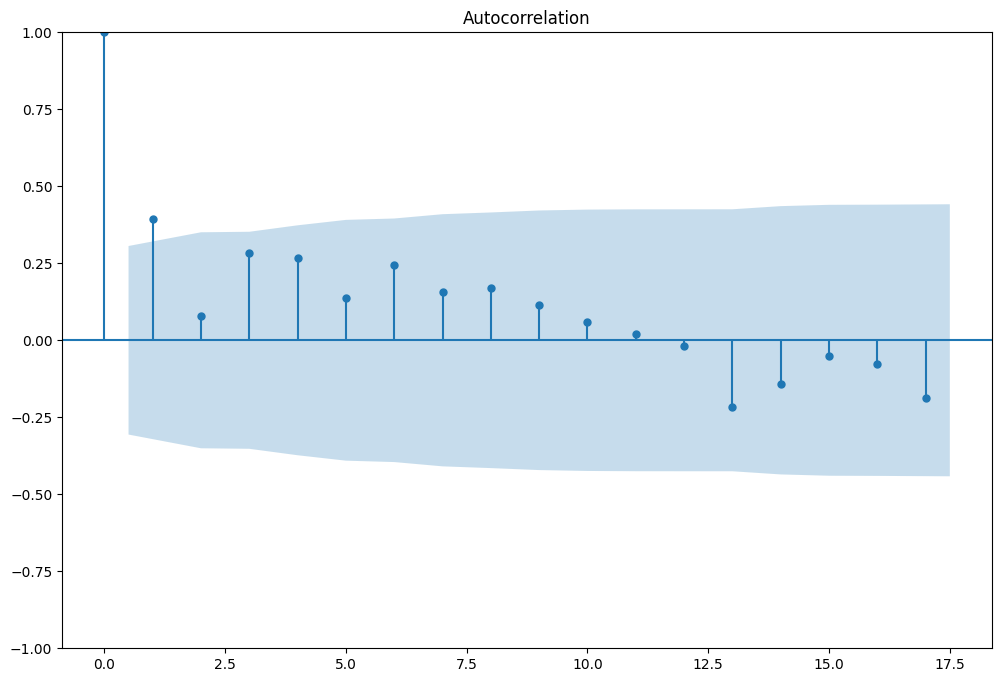

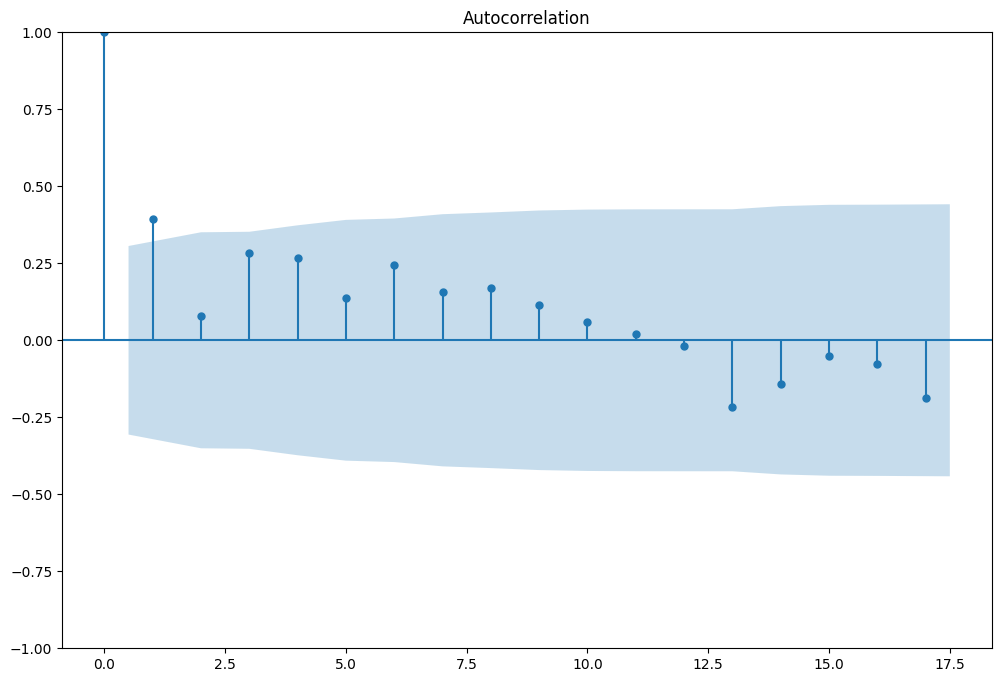

In [596]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mnc_monthly)

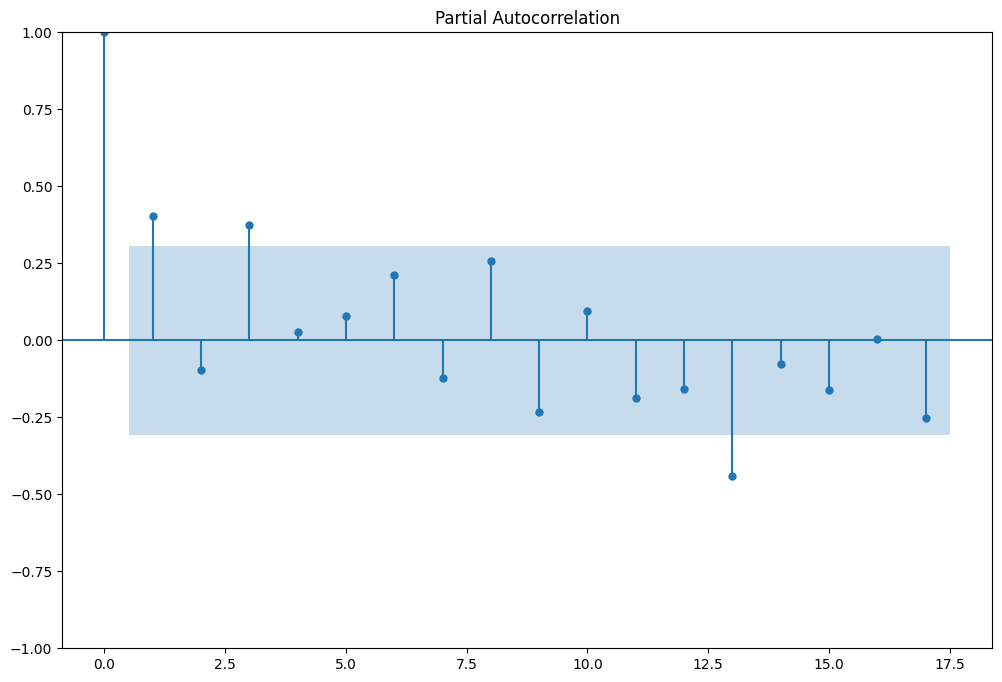

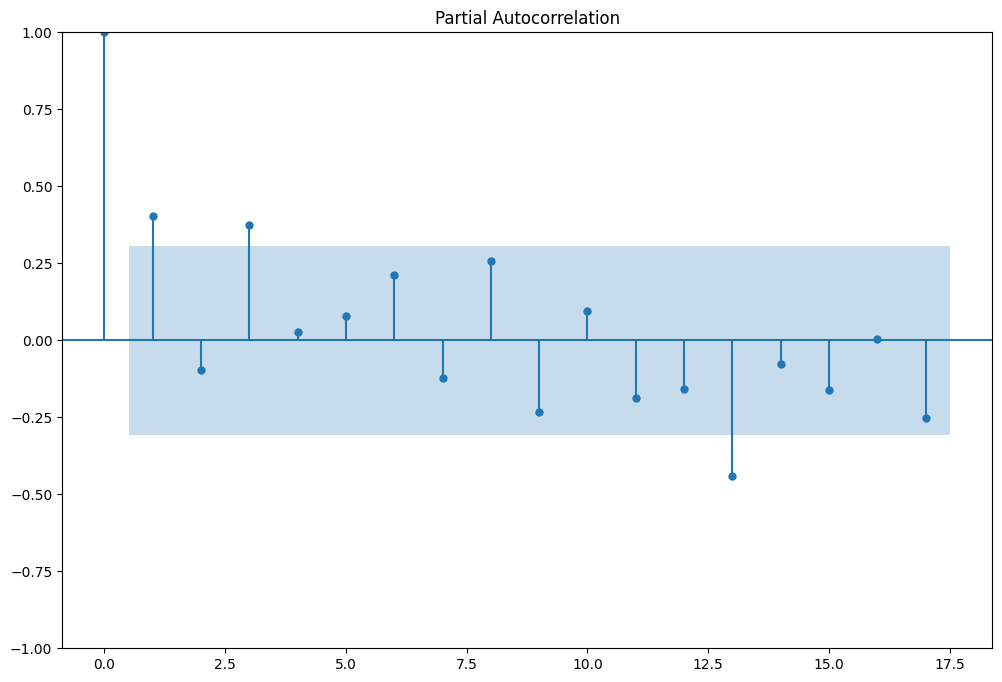

In [597]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(mnc_monthly)

#TIME SERIES GRAPH

In [598]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd=seasonal_decompose(mnc_monthly['TotalVisitedPatients'],model='additive', period=1)
sd

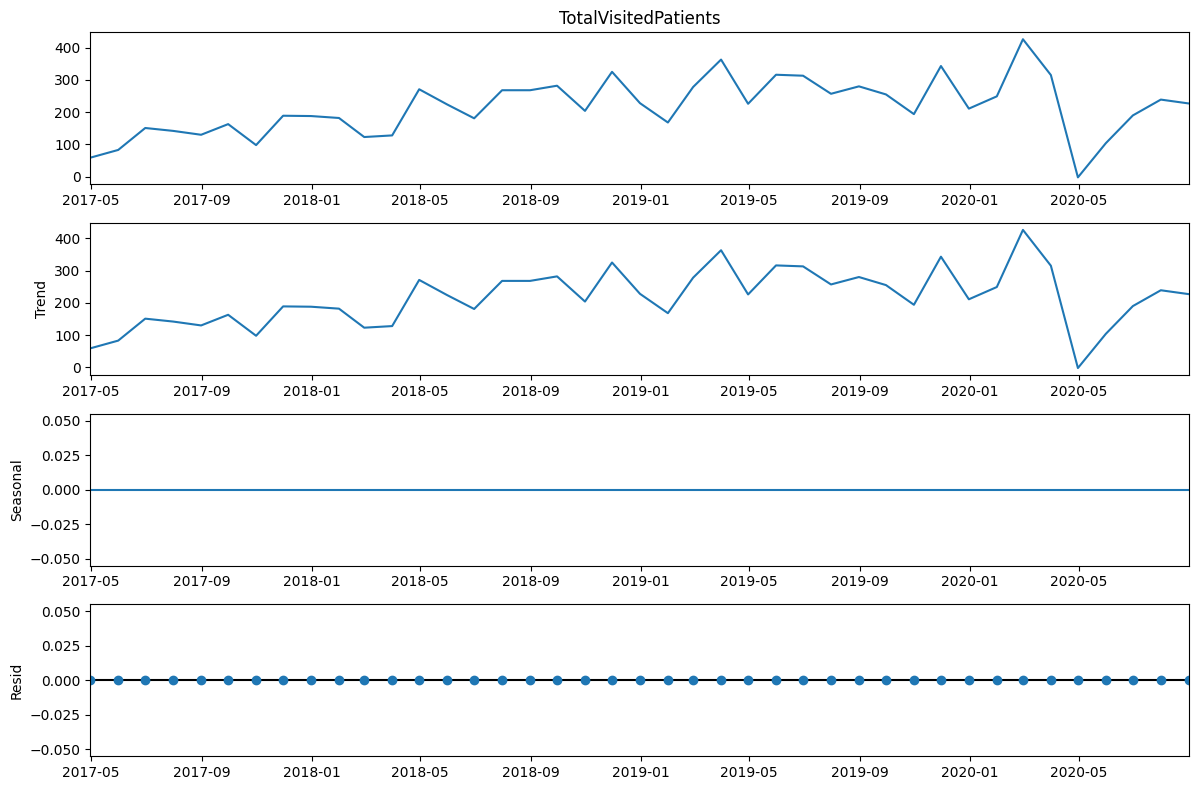

In [599]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from statsmodels.tsa.seasonal import seasonal_decompose

fig = sd.plot()
plt.show()

####Time series of total patient visits to hospitals.
Decomposing the time series: It can be observed that there is a trend but there is no seasonality

#OUT OF SAMPLE FORECASTING (OOSF)

In [600]:
total_months = len(mnc_monthly['TotalVisitedPatients'])
train_len = len(mnc_monthly['TotalVisitedPatients']) - 6
train = mnc_monthly[0:train_len]

oosf_months=3
oosf_end_month = total_months + oosf_months
mnc_monthly_mean = mnc_monthly['TotalVisitedPatients'].mean()

train_test = mnc_monthly[0:total_months]
train_test_len = len(mnc_monthly[0:total_months])
from datetime import timedelta
for i in range(total_months,oosf_end_month):
    idx = mnc_monthly.tail(1).index[0] + pd.DateOffset(months=1)
    mnc_monthly.loc[idx] = mnc_monthly_mean
    
test= mnc_monthly[train_len :total_months]
oosf = mnc_monthly[total_months :oosf_end_month ]

# Populate the OOSF months with default values of forecast
# Choose the last six months as test

In [601]:
mnc_monthly_mean

215.58536585365854

In [602]:
total_months

41

In [603]:
train_test_len

41

In [604]:
train_test

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,59
2017-05-31,83
2017-06-30,151
2017-07-31,142
2017-08-31,130
2017-09-30,163
2017-10-31,98
2017-11-30,189
2017-12-31,188


In [605]:
len(oosf)

3

#MAPE CALCULATION METHODS
### Method Name
  #### a) Applying the Model
  #### b) Plotting the graph
  #### c) Calculation for MAPE (Mean absolute percentage error)
  #### d) Cumulative Results for MAPE

###1. NAVIE METHOD

#### a) Applying the Model

In [606]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['TotalVisitedPatients'][train_len-1]

In [607]:
y_hat_oos_naive= oosf.copy()
y_hat_oos_naive['oos_naive_forecast'] = train_test['TotalVisitedPatients'][total_months-1]

In [608]:
y_hat_oos_naive

,TotalVisitedPatients,oos_naive_forecast
MncVisiteDate,,
2020-09-30,215.585366,227
2020-10-30,215.585366,227
2020-11-30,215.585366,227


#### b) Plotting the graph

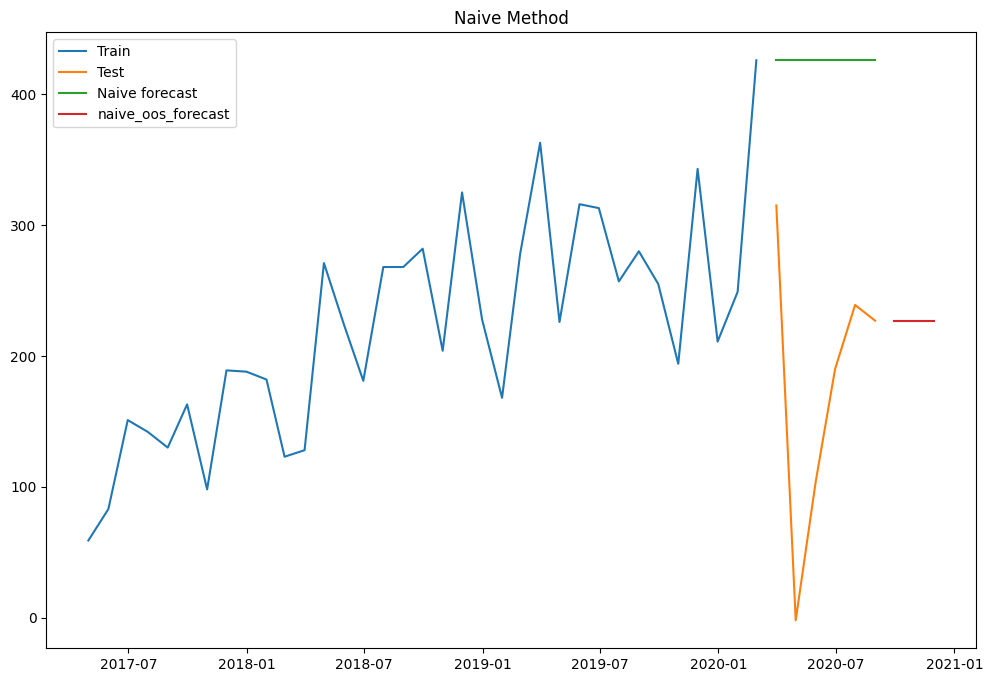

In [609]:
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.plot(y_hat_oos_naive['oos_naive_forecast'],label='naive_oos_forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [610]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_naive['naive_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [611]:
results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape]})
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84


### 2. SIMPLE AVERAGE



####a) Applying the Model

In [612]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['TotalVisitedPatients'].mean()
y_hat_avg

,TotalVisitedPatients,avg_forecast
MncVisiteDate,,
2020-03-31,315.0,221.885714
2020-04-30,-2.0,221.885714
2020-05-31,104.0,221.885714
2020-06-30,190.0,221.885714
2020-07-31,239.0,221.885714
2020-08-31,227.0,221.885714


In [613]:
y_hat_oos_avg= oosf.copy()
y_hat_oos_avg['oos_avg_forecast'] = train_test['TotalVisitedPatients'].mean()

In [614]:
y_hat_oos_avg

,TotalVisitedPatients,oos_avg_forecast
MncVisiteDate,,
2020-09-30,215.585366,215.585366
2020-10-30,215.585366,215.585366
2020-11-30,215.585366,215.585366


#### b) Plotting the graph

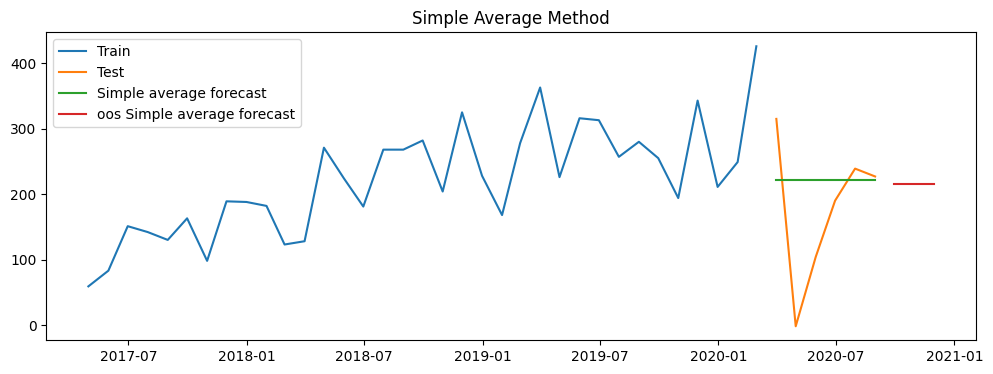

In [615]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.plot(y_hat_oos_avg['oos_avg_forecast'], label = 'oos Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [616]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_avg['avg_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [617]:
tempResults = pd.DataFrame({'Method':['Simple average method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53


### 3. SIMPLE MOVING AVERAGE

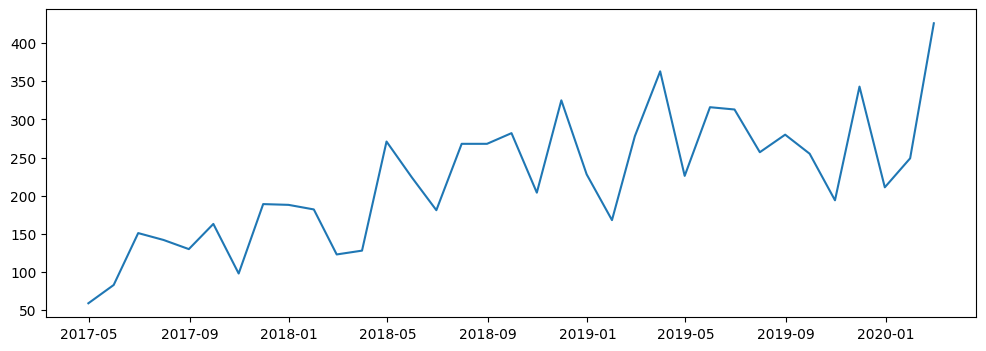

In [618]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='TotalVisitedPatients')

#### a) Applying the Model
  

In [619]:
y_hat_sma = mnc_monthly.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = mnc_monthly['TotalVisitedPatients'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [620]:
y_hat_oos_sma = oosf.copy()
ma_window = 3
y_hat_oos_sma['oos_sma_forecast'] = mnc_monthly['TotalVisitedPatients'].rolling(ma_window).mean()

In [621]:
y_hat_oos_sma['oos_sma_forecast']

MncVisiteDate
2020-09-30    227.195122
2020-10-30    219.390244
2020-11-30    215.585366
Name: oos_sma_forecast, dtype: float64

#### b) Plotting the graph
  

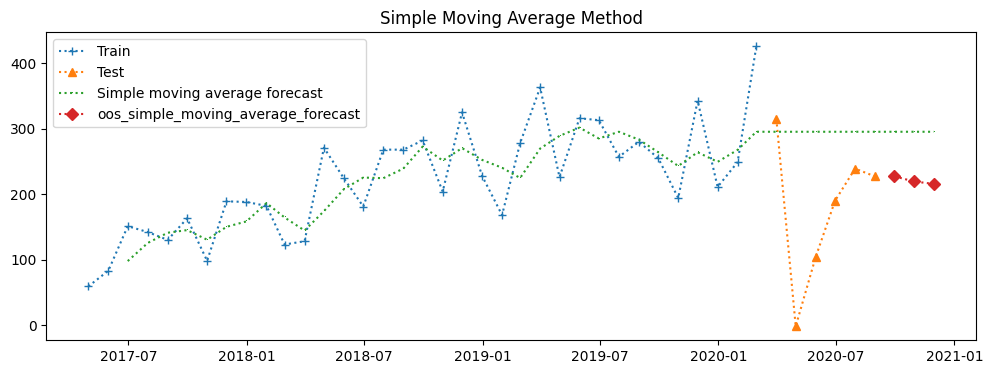

In [622]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train', marker ='+', linestyle = 'dotted')
plt.plot(test['TotalVisitedPatients'], label='Test', marker ='^', linestyle = 'dotted')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast', marker= ',', linestyle = 'dotted')
plt.plot(y_hat_oos_sma['oos_sma_forecast'],label='oos_simple_moving_average_forecast', marker = 'D', linestyle = 'dotted')
plt.plot(marker='o')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
 

In [623]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_sma['sma_forecast'][train_len:])/test['TotalVisitedPatients'])*100,2)

 #### d) Cumulative Results for MAPE

In [624]:
tempResults = pd.DataFrame({'Method':['Simple moving average forecast'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89


###4. SIMPLE EXPONENTIAL SMOOTHING TECHNIQUE
The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES)13. This method is suitable for forecasting data with no clear trend or seasonal pattern.

#### a) Applying the Model
  

In [625]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['TotalVisitedPatients'])
model_fit = model.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2
 
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))


In [626]:
len(test)
y_hat_ses['ses_forecast']

MncVisiteDate
2020-03-31    291.479787
2020-04-30    291.479787
2020-05-31    291.479787
2020-06-30    291.479787
2020-07-31    291.479787
2020-08-31    291.479787
Name: ses_forecast, dtype: float64

In [627]:
print(model_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 59.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [628]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_tt = SimpleExpSmoothing(train['TotalVisitedPatients'])
model_tt_fit = model_tt.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2 

In [629]:
print(model_tt_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 59.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [630]:
y_hat_oos_ses = oosf.copy()
y_hat_oos_ses['oos_ses_forecast'] = model_tt_fit.predict((len(train_test) +1), (len(train_test) +oosf_months))

In [631]:
y_hat_oos_ses

,TotalVisitedPatients,oos_ses_forecast
MncVisiteDate,,
2020-09-30,215.585366,NaN
2020-10-30,215.585366,NaN
2020-11-30,215.585366,291.479787


In [632]:
print (y_hat_oos_ses['oos_ses_forecast'])

MncVisiteDate
2020-09-30           NaN
2020-10-30           NaN
2020-11-30    291.479787
Name: oos_ses_forecast, dtype: float64


In [633]:
y_hat_oos_ses

,TotalVisitedPatients,oos_ses_forecast
MncVisiteDate,,
2020-09-30,215.585366,NaN
2020-10-30,215.585366,NaN
2020-11-30,215.585366,291.479787


#### b) Plotting the graph
  

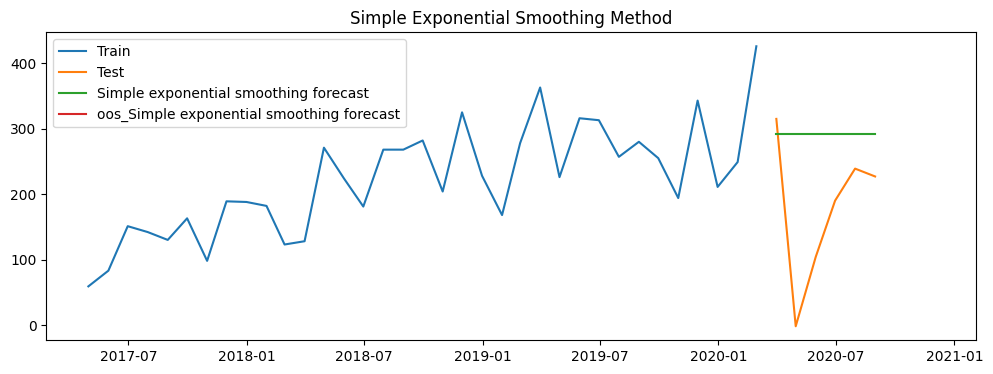

In [634]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.plot(y_hat_oos_ses['oos_ses_forecast'], label='oos_Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [635]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ses['ses_forecast'])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE 

In [636]:
tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08


### 5. HOLT METHOD

#### a) Applying the Model
  

In [637]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']),seasonal_periods=12, trend='additive', seasonal=None)

model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.337540048539701e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 113.22012827378414, 'initial_trend': 6.038015910714876, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [638]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

In [639]:
result = model_fit.forecast()
result

array([330.58870105])

In [640]:
y_hat_holt['holt_forecast']

MncVisiteDate
2020-03-31    330.588701
2020-04-30    336.626717
2020-05-31    342.664733
2020-06-30    348.702749
2020-07-31    354.740765
2020-08-31    360.778781
Name: holt_forecast, dtype: float64

In [641]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_test['TotalVisitedPatients']),seasonal_periods=12, trend='additive', seasonal=None)

model_tt_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.337540048539701e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 113.22012827378414, 'initial_trend': 6.038015910714876, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [642]:
y_hat_oos_holt = oosf.copy()
y_hat_oos_holt['oos_holt_forecast'] = model_tt_fit.predict(len(train_test) +1, (len(train_test) +oosf_months))

In [643]:
print(len(train_test)+ (oosf_months))
print(oosf_months)

44
3


In [644]:
y_hat_oos_holt['oos_holt_forecast']

MncVisiteDate
2020-09-30    179.847179
2020-10-30    170.839668
2020-11-30    161.832158
Name: oos_holt_forecast, dtype: float64

In [645]:
ci = 100
upper_limit = y_hat_oos_holt['TotalVisitedPatients'] + ci
lower_imit  = y_hat_oos_holt['TotalVisitedPatients'] - ci

In [646]:
upper_limit

MncVisiteDate
2020-09-30    315.585366
2020-10-30    315.585366
2020-11-30    315.585366
Name: TotalVisitedPatients, dtype: float64

In [647]:
y_hat_oos_holt['upper_limit'] = y_hat_oos_holt['oos_holt_forecast'] + ci
y_hat_oos_holt['lower_imit'] = y_hat_oos_holt['oos_holt_forecast'] - ci

In [648]:
y_hat_oos_holt['oos_holt_forecast']

MncVisiteDate
2020-09-30    179.847179
2020-10-30    170.839668
2020-11-30    161.832158
Name: oos_holt_forecast, dtype: float64

In [649]:
y_hat_oos_holt['upper_limit']

MncVisiteDate
2020-09-30    279.847179
2020-10-30    270.839668
2020-11-30    261.832158
Name: upper_limit, dtype: float64

In [650]:
y_hat_oos_holt

,TotalVisitedPatients,oos_holt_forecast,upper_limit,lower_imit
MncVisiteDate,,,,
2020-09-30,215.585366,179.847179,279.847179,79.847179
2020-10-30,215.585366,170.839668,270.839668,70.839668
2020-11-30,215.585366,161.832158,261.832158,61.832158


#### b) Plotting the graph
  

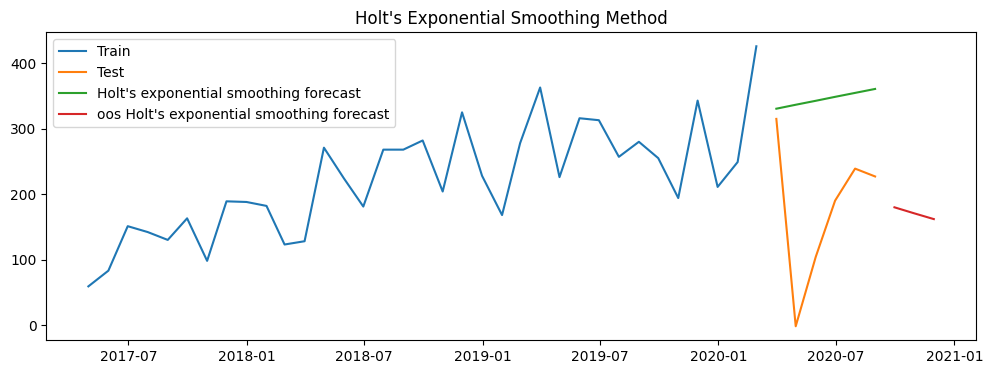

In [651]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.plot(y_hat_oos_holt['oos_holt_forecast'], label='oos Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)



In [652]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_holt['holt_forecast'])/test['TotalVisitedPatients'])*100,2)

  #### d) Cumulative Results for MAPE

In [653]:
tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08
0,Holt's exponential smoothing method,-2751.00


### 6. HOLT WINTERS ADDITIVE METHOD

#### a) Applying the Model

In [654]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)

print(model_fit.params)

{'smoothing_level': 0.0007556563478782198, 'smoothing_trend': 0.00010412092975304533, 'smoothing_seasonal': 0.0005880331529777105, 'damping_trend': nan, 'initial_level': 113.71486663802223, 'initial_trend': 6.178033028284916, 'initial_seasons': array([ -8.77717999,   9.06901291,  10.49109907,  10.58178402,
         7.83773538,   8.70160128, -66.09692729,  49.70830344,
       -33.0206251 , -51.92267918,  18.90095633,  19.38564025]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [655]:
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

#### b) Plotting the graph

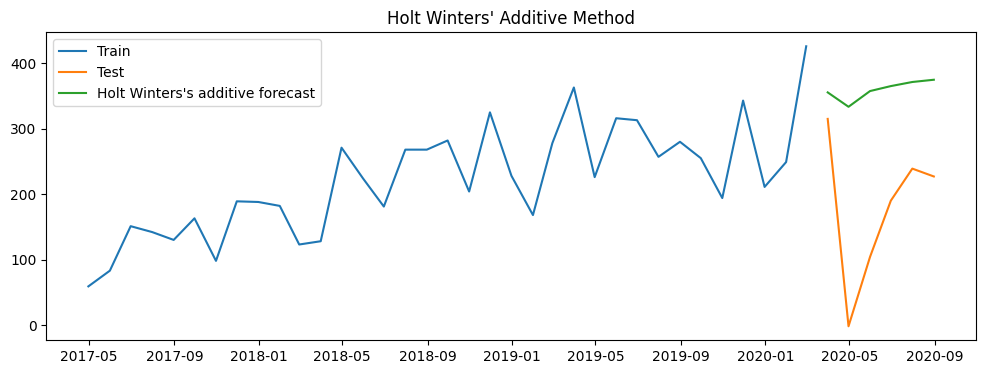

In [656]:
plt.figure(figsize=(12,4))
plt.plot( train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [657]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_hwa['hw_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [658]:
tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08
0,Holt's exponential smoothing method,-2751.00
0,Holt Winters' additive method,-2717.75


### 7. HOLT WINTERS MULTIPLICATIVE METHOD

#### a) Applying the Model

In [659]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
print(model_fit.summary)

{'smoothing_level': 0.07080756703658261, 'smoothing_trend': 0.03095371052816143, 'smoothing_seasonal': 0.4522748409691428, 'damping_trend': nan, 'initial_level': 82.76810770925509, 'initial_trend': 3.8131233639058166, 'initial_seasons': array([1.26850525, 1.69868767, 1.40282111, 1.51515802, 1.42873969,
       1.39044897, 1.05229142, 1.71077093, 1.17570431, 1.12059474,
       1.65708622, 1.72395984]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
<bound method HoltWintersResults.summary of <statsmodels.tsa.holtwinters.results.HoltWintersResults object at 0x7f9bdaa272e0>>


In [660]:
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

#### b) Plotting the graph

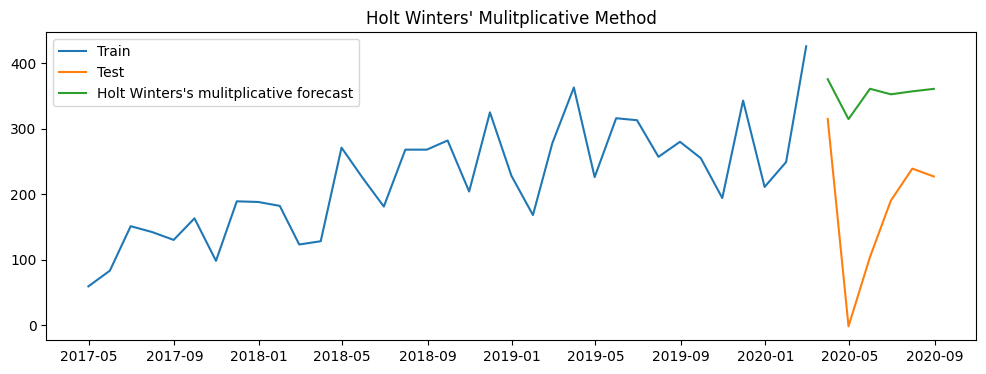

In [661]:
plt.figure(figsize=(12,4))
plt.plot( train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [662]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_hwm['hw_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [663]:
tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08
0,Holt's exponential smoothing method,-2751.00
0,Holt Winters' additive method,-2717.75
0,Holt Winters' multiplicative method,-2561.94


### Regression Models

#### Stationary Test

In [664]:
# Stationarity test - KPSS test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(mnc_monthly['TotalVisitedPatients'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577174
Critical Values @ 0.05: 0.46
p-value: 0.024711


#### Box Cox transformation to make variance constant

In [665]:
train.describe()

,TotalVisitedPatients
count,35.000000
mean,221.885714
std,83.429354
min,59.000000
25%,165.500000
50%,224.000000
75%,274.500000
max,426.000000


In [666]:
test.describe()

,TotalVisitedPatients
count,6.000000
mean,178.833333
std,112.166691
min,-2.000000
25%,125.500000
50%,208.500000
75%,236.000000
max,315.000000


In [667]:
oosf.describe()

,TotalVisitedPatients
count,3.000000
mean,215.585366
std,0.000000
min,215.585366
25%,215.585366
50%,215.585366
75%,215.585366
max,215.585366


In [668]:
mnc_monthly.describe()

,TotalVisitedPatients
count,44.000000
mean,215.585366
std,84.778227
min,-2.000000
25%,166.750000
50%,215.585366
75%,268.750000
max,426.000000


#### Graph After Box Cox transform

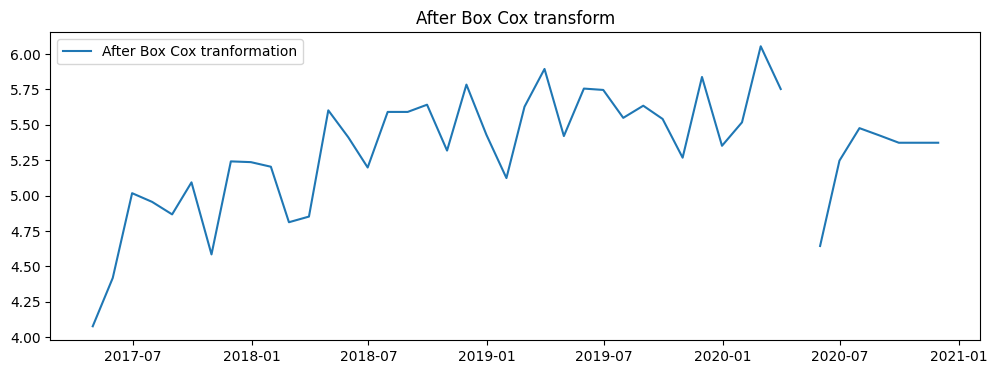

In [669]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(mnc_monthly['TotalVisitedPatients'], lmbda=0), index = mnc_monthly.index) # lmbda=0 implies log transformation

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [670]:
data_boxcox

MncVisiteDate
2017-04-30    4.077537
2017-05-31    4.418841
2017-06-30    5.017280
2017-07-31    4.955827
2017-08-31    4.867534
2017-09-30    5.093750
2017-10-31    4.584967
2017-11-30    5.241747
2017-12-31    5.236442
2018-01-31    5.204007
2018-02-28    4.812184
2018-03-31    4.852030
2018-04-30    5.602119
2018-05-31    5.411646
2018-06-30    5.198497
2018-07-31    5.590987
2018-08-31    5.590987
2018-09-30    5.641907
2018-10-31    5.318120
2018-11-30    5.783825
2018-12-31    5.429346
2019-01-31    5.123964
2019-02-28    5.627621
2019-03-31    5.894403
2019-04-30    5.420535
2019-05-31    5.755742
2019-06-30    5.746203
2019-07-31    5.549076
2019-08-31    5.634790
2019-09-30    5.541264
2019-10-31    5.267858
2019-11-30    5.837730
2019-12-31    5.351858
2020-01-31    5.517453
2020-02-29    6.054439
2020-03-31    5.752573
2020-04-30         NaN
2020-05-31    4.644391
2020-06-30    5.247024
2020-07-31    5.476464
2020-08-31    5.424950
2020-09-30    5.373357
2020-10-30    5.3733

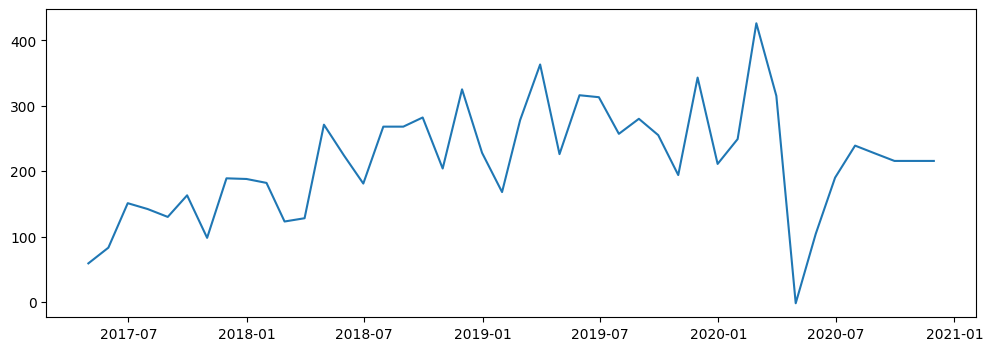

In [671]:
plt.figure(figsize=(12,4))
plt.plot( mnc_monthly['TotalVisitedPatients'], label='TotalVisitedPatients')

#### Adjusting mnc_len

In [672]:
mnc_len = mnc_monthly['TotalVisitedPatients']

#### Install pmdarima

In [673]:
# !pip install pmdarima

Differencing to Remove Trend

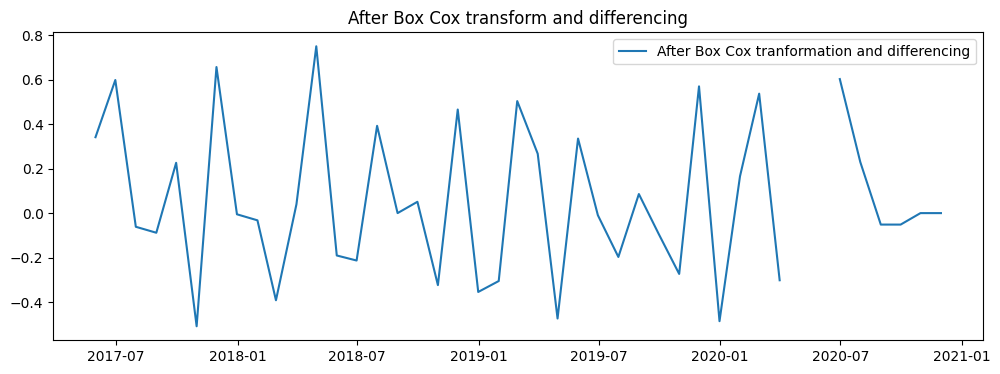

In [674]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), mnc_monthly.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [675]:
data_boxcox_diff.dropna(inplace=True)

In [676]:
train_data_boxcox = data_boxcox[:train_len] # Arima
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len] # Rest
test_data_boxcox_diff = data_boxcox_diff[train_len:]

# Differencing and boxcox done on the entire data, hence need to split it again

In [677]:
test_data_boxcox_diff

MncVisiteDate
2020-06-30    0.602633
2020-07-31    0.229439
2020-08-31   -0.051514
2020-09-30   -0.051593
2020-10-30    0.000000
2020-11-30    0.000000
dtype: float64

### 8. AR

#### a) Applying the Model
  

In [678]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params) # gives the intercept and coefficient values

const     0.048307
ar.L1    -0.382938
sigma2    0.107205
dtype: float64


In [679]:
# In order to make the forecast, we need to transform the forecasts made to the original form
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])
# In order to get back the original time series we do a cumulative sum to remove the differencing and exponentiate the 
# forecasts in order to remove the effect of the boxcox transformation

In [680]:
from datetime import timedelta
data_boxcox_diff.index.max()

Timestamp('2020-11-30 00:00:00')

#### b) Plotting the graph
  

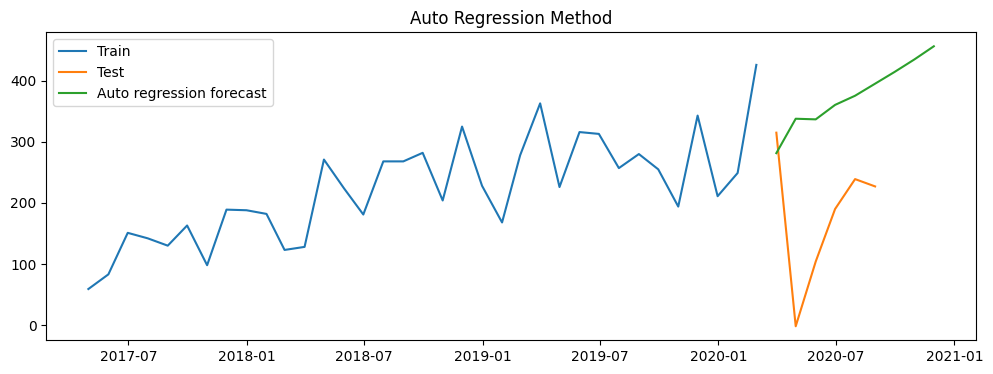

In [681]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [682]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ar['ar_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [683]:
tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08
0,Holt's exponential smoothing method,-2751.00
0,Holt Winters' additive method,-2717.75
0,Holt Winters' multiplicative method,-2561.94
0,Autoregressive (AR) method,-2756.12


### 9. MA

#### a) Applying the Model
  

In [684]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()

print(model_fit.params)
# Default parameters are 0,0,1
# Based on ACF and PACF plots, trying P =2, D =1, Q = 2

const     0.034338
ma.L1    -0.781953
sigma2    0.082132
dtype: float64


In [685]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

#### b) Plotting the graph
  

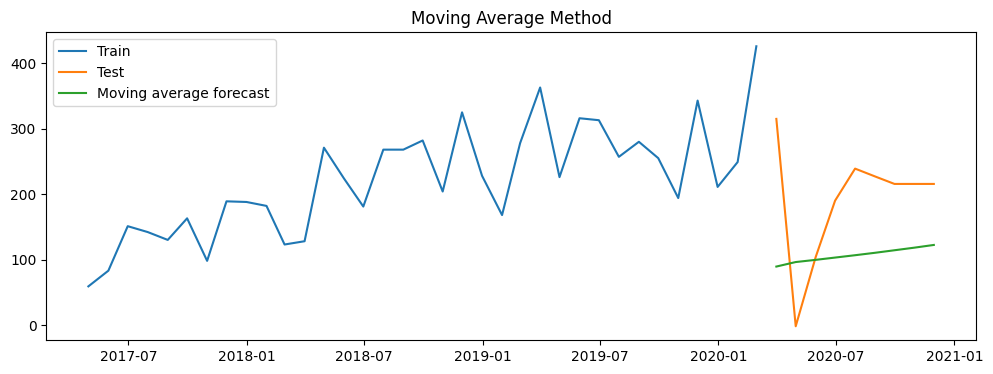

In [686]:
plt.figure(figsize=(12,4))
plt.plot(mnc_monthly['TotalVisitedPatients'][:train_len], label='Train')
plt.plot(mnc_monthly['TotalVisitedPatients'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [687]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ma['ma_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [688]:
tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08
0,Holt's exponential smoothing method,-2751.00
0,Holt Winters' additive method,-2717.75
0,Holt Winters' multiplicative method,-2561.94
0,Autoregressive (AR) method,-2756.12
0,Moving Average (MA) method,-780.13


### 11. ARMA 

#### a) Applying the Model

In [689]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()

print(model_fit.params)

const     0.034227
ar.L1     0.021526
ma.L1    -0.790200
sigma2    0.082110
dtype: float64


In [690]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

#### b) Plotting the graph
  

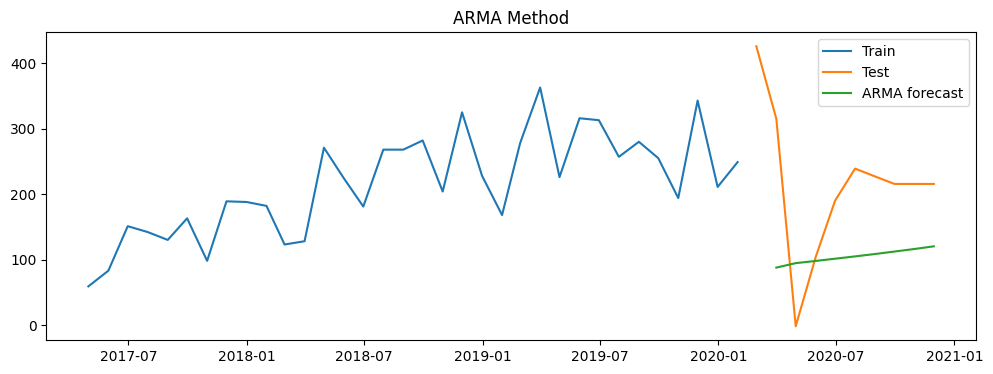

In [691]:
plt.figure(figsize=(12,4))
plt.plot( mnc_monthly['TotalVisitedPatients'][:train_len-1], label='Train')
plt.plot(mnc_monthly['TotalVisitedPatients'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [692]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_arma['arma_forecast'][train_len-1:])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [693]:
tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08
0,Holt's exponential smoothing method,-2751.00
0,Holt Winters' additive method,-2717.75
0,Holt Winters' multiplicative method,-2561.94
0,Autoregressive (AR) method,-2756.12
0,Moving Average (MA) method,-780.13
0,Autoregressive moving average (ARMA) method,-765.39


### 12. ARIMA

#### a) Applying the Model

In [694]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.params)

ar.L1     0.001684
ma.L1    -0.617222
sigma2    0.098304
dtype: float64


In [695]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

#### b) Plotting the graph
  

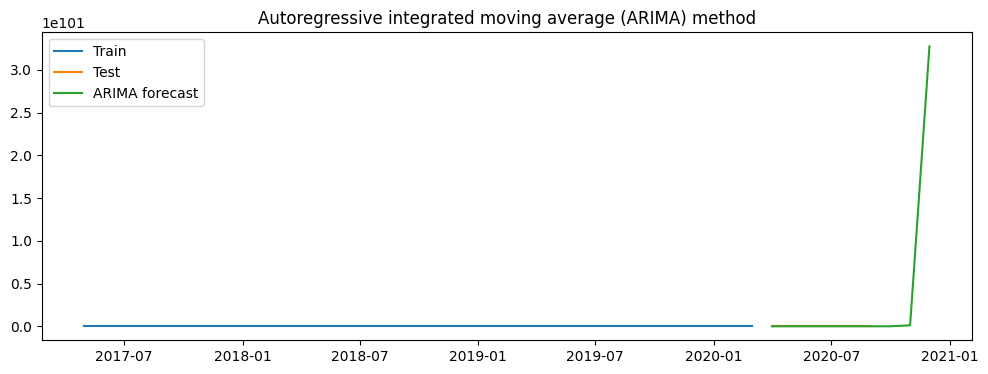

In [696]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [697]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ar['ar_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [698]:
tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08
0,Holt's exponential smoothing method,-2751.00
0,Holt Winters' additive method,-2717.75
0,Holt Winters' multiplicative method,-2561.94
0,Autoregressive (AR) method,-2756.12
0,Moving Average (MA) method,-780.13
0,Autoregressive moving average (ARMA) method,-765.39


### 13. SARIMA 

#### a) Applying the Model

In [699]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()

print(model_fit.params)

ar.L1       0.221498
ma.L1      -0.749385
ar.S.L12   -0.482833
sigma2      0.134351
dtype: float64


In [700]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

#### b) Plotting the graph
  

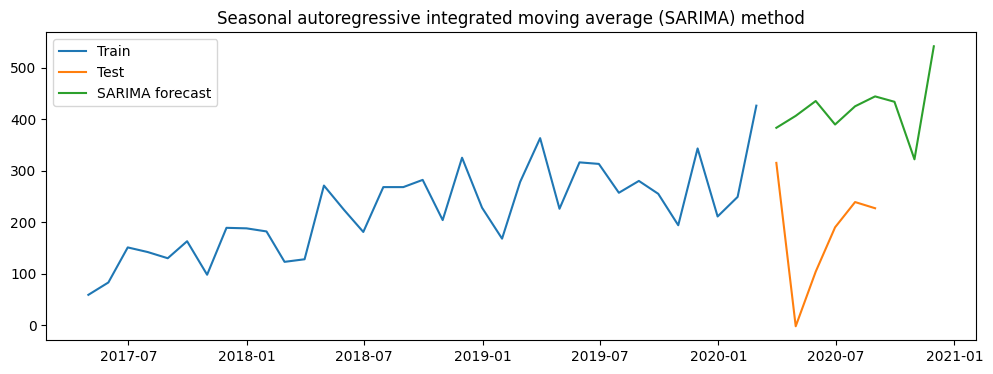

In [701]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [702]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [703]:
tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08
0,Holt's exponential smoothing method,-2751.00
0,Holt Winters' additive method,-2717.75
0,Holt Winters' multiplicative method,-2561.94
0,Autoregressive (AR) method,-2756.12
0,Moving Average (MA) method,-780.13
0,Autoregressive moving average (ARMA) method,-765.39


# FINAL MAPE VALUES

In [704]:
print("Here are the calculated MAPE Values for respective methods for district 12")
results

Here are the calculated MAPE Values for respective methods for district 12


,Method,MAPE
0,Naive method,-3460.84
0,Simple average method,-1837.53
0,Simple moving average forecast,-2427.89
0,Simple exponential smoothing forecast,-2397.08
0,Holt's exponential smoothing method,-2751.00
0,Holt Winters' additive method,-2717.75
0,Holt Winters' multiplicative method,-2561.94
0,Autoregressive (AR) method,-2756.12
0,Moving Average (MA) method,-780.13
0,Autoregressive moving average (ARMA) method,-765.39
